In [79]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt

# LDA

In [40]:
class LDA:
    
    def __init__(self) -> None:
        self.sigma = None
        self.mu_0 = None
        self.mu_1 = None
        self.fraction_0 = None
        self.fraction_1 = None

    def fit(self, X, y):
        y = pd.DataFrame(y, columns=['y'])
        data = pd.concat([X, y], axis=1)
        data_0 = data[data['y'] == 0]
        data_1 = data[data['y'] == 1]
        data_0 = data_0.drop(columns='y')
        data_1 = data_1.drop(columns='y')
        data = data.drop(columns='y')

        self.sigma = data.cov()
        self.mu_0 = data_0.mean()
        self.mu_1 = data_1.mean()
        self.fraction_0 = len(data_0) / len(data)
        self.fraction_1 = len(data_1) / len(data)

    def gaussian(self, x, mu, sigma):
        n = len(x)
        det = np.linalg.det(sigma)
        inv = np.linalg.inv(sigma)
        x_mu = (x - mu)
        result = 1 / (np.power(2 * pi, n / 2) * np.power(det, 0.5)) * np.exp(-0.5 * (x_mu.T @ inv @ x_mu))
        return result

    def predict_proba(self, X_test):
        numerator = self.fraction_1 * self.gaussian(X_test, self.mu_1, self.sigma)
        denominator = self.fraction_1 * self.gaussian(X_test, self.mu_1, self.sigma) + self.fraction_0 * self.gaussian(X_test, self.mu_0, self.sigma)
        return numerator / denominator 


    def predict(self, X_test):
        X_test_copy = X_test.copy()
        X_test_copy.loc[self.predict_proba(X_test) > 0.5, 'y_pred'] = 1
        X_test_copy.loc[self.predict_proba(X_test) <= 0.5, 'y_pred'] = 0

        return X_test_copy['y_pred']
    

    def return_params(self):
        return {"covariance matrix": self.sigma,
                 "mean for class 0": self.mu_0, "mean for class 1": self.mu_1}
    

# QDA

In [41]:
class QDA:
    def __init__(self) -> None:
        self.sigma_0 = None
        self.sigma_1 = None
        self.mu_0 = None
        self.mu_1 = None
        self.fraction_0 = None
        self.fraction_1 = None

    def fit(self, X, y):
        y = pd.DataFrame(y, columns=['y'])
        data = pd.concat([X, y], axis=1)
        data_0 = data[data['y'] == 0]
        data_1 = data[data['y'] == 1]
        data_0 = data_0.drop(columns='y')
        data_1 = data_1.drop(columns='y')

        self.sigma_0 = data_0.cov()
        self.sigma_1 = data_1.cov()
        self.mu_0 = data_0.mean()
        self.mu_1 = data_1.mean()
        self.fraction_0 = len(data_0) / len(data)
        self.fraction_1 = len(data_1) / len(data)

    def gaussian(self, x, mu, sigma):
        n = len(x)
        det = np.linalg.det(sigma)
        inv = np.linalg.inv(sigma)
        x_mu = (x - mu)
        result = 1 / (np.power(2 * pi, n / 2) * np.power(det, 0.5)) * np.exp(-0.5 * (x_mu.T @ inv @ x_mu))
        return result

    def predict_proba(self, X_test):
        numerator = self.fraction_1 * self.gaussian(X_test, self.mu_1, self.sigma_1)
        denominator = self.fraction_1 * self.gaussian(X_test, self.mu_1, self.sigma_1) + self.fraction_0 * self.gaussian(X_test, self.mu_0, self.sigma_0)
        return numerator / denominator 


    def predict(self, X_test):
        X_test_copy = X_test.copy()
        X_test_copy.loc[self.predict_proba(X_test) > 0.5, 'y_pred'] = 1
        X_test_copy.loc[self.predict_proba(X_test) <= 0.5, 'y_pred'] = 0

        return X_test_copy['y_pred']
    

    def return_params(self):
        return {"covariance matrix for class 0": self.sigma_0, "covariance matrix for class 1" :self.sigma_1,
                 "mean for class 0": self.mu_0, "mean for class 1": self.mu_1}

# Naive Bayes

In [42]:
class NB:
    """
    Naive Bayes classifier implementation. Naive Bayes assumes that the features are conditionally independent given the class. 
    This results in a diagonal covariance matrix for each class. 

    Attributes:
        sigma_0 (ndarray): Covariance matrix (diagonal) for class 0.
        sigma_1 (ndarray): Covariance matrix (diagonal) for class 1.
        mu_0 (Series): Mean vector for class 0.
        mu_1 (Series): Mean vector for class 1.
        fraction_0 (float): Fraction of samples belonging to class 0.
        fraction_1 (float): Fraction of samples belonging to class 1.

    Methods:
        fit(X, y): Fit the Naive Bayes classifier to the training data.
        gaussian(x, mu, sigma): Compute the Gaussian probability density function.
        predict_proba(X_test): Predict the class probabilities for the test data.
        predict(X_test): Predict the class labels for the test data.
        return_params(): Return the parameters of the Naive Bayes classifier.
    """
    
    def __init__(self) -> None:
        self.sigma_0 = None
        self.sigma_1 = None
        self.mu_0 = None
        self.mu_1 = None
        self.fraction_0 = None
        self.fraction_1 = None

    def fit(self, X, y):
        """
        Fit the Naive Bayes classifier to the training data.

        Args:
            X (DataFrame): Training data features.
            y (array-like): Training data labels.
        """
        y = pd.DataFrame(y, columns=['y'])
        data = pd.concat([X, y], axis=1)
        data_0 = data[data['y'] == 0]
        data_1 = data[data['y'] == 1]
        data_0 = data_0.drop(columns='y')
        data_1 = data_1.drop(columns='y')

        self.sigma_0 = np.diag(np.diag(data_0.cov()))
        self.sigma_1 = np.diag(np.diag(data_1.cov()))
        self.mu_0 = data_0.mean()
        self.mu_1 = data_1.mean()
        self.fraction_0 = len(data_0) / len(data)
        self.fraction_1 = len(data_1) / len(data)
        

    def gaussian(self, x, mu, sigma):
        """
        Compute the Gaussian probability density function.

        Args:
            x (ndarray): Input vector.
            mu (Series): Mean vector.
            sigma (ndarray): Covariance matrix (diagonal).

        Returns:
            ndarray: Gaussian probability density values.
        """
        n = len(x)
        det = np.linalg.det(sigma)
        inv = np.linalg.inv(sigma)
        x_mu = (x - mu)
        result = 1 / (np.power(2 * pi, n / 2) * np.power(det, 0.5)) * np.exp(-0.5 * (x_mu.T @ inv @ x_mu))
        return result

    def predict_proba(self, X_test):
        """
        Predict the class probabilities for the test data.

        Args:
            X_test (DataFrame): Test data features.

        Returns:
            ndarray: Predicted class probabilities.
        """
        numerator = self.fraction_1 * self.gaussian(X_test, self.mu_1, self.sigma_1)
        denominator = self.fraction_1 * self.gaussian(X_test, self.mu_1, self.sigma_1) + self.fraction_0 * self.gaussian(X_test, self.mu_0, self.sigma_0)
        return numerator / denominator 


    def predict(self, X_test):
        """
        Predict the class labels for the test data.

        Args:
            X_test (DataFrame): Test data features.

        Returns:
            Series: Predicted class labels.
        """
        X_test_copy = X_test.copy()
        X_test_copy.loc[self.predict_proba(X_test) > 0.5, 'y_pred'] = 1
        X_test_copy.loc[self.predict_proba(X_test) <= 0.5, 'y_pred'] = 0

        return X_test_copy['y_pred']


    def return_params(self):
        """
        Return the parameters of the Naive Bayes classifier.

        Returns:
            dict: Parameters of the Naive Bayes classifier.
        """
        return {"covariance matrix for class 0": self.sigma_0, "covariance matrix for class 1" :self.sigma_1,
                 "mean for class 0": self.mu_0, "mean for class 1": self.mu_1}

# Testing

In [43]:
lda = LDA()
X = pd.DataFrame({'x1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'x2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]})
y = pd.Series([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
lda.fit(X, y)
param = lda.return_params()
for key, value in param.items():
    print(f"{key}\n{value}\n")

covar = param['covariance matrix']
np.diag(np.diag(covar))

covariance matrix
          x1        x2
x1  9.166667 -9.166667
x2 -9.166667  9.166667

mean for class 0
x1    3.0
x2    8.0
dtype: float64

mean for class 1
x1    8.0
x2    3.0
dtype: float64



array([[9.16666667, 0.        ],
       [0.        , 9.16666667]])

# Generating datasets

In [45]:
def generate_data(a, ro=0, n_samples=1000):
    """
    Generate synthetic data for binary classification. 
    When ro == 0 generates data with scheme 1. When ro != 0 generates data with scheme 2.
    
    Parameters:
    a (float): Mean value for the positive class.
    ro (float, optional): Covariance between features. Defaults to 0.
    n_samples (int, optional): Number of samples to generate. Defaults to 1000.
    
    Returns:
    pd.DataFrame: Generated synthetic data with features 'x1', 'x2' and target variable 'y'.
    """
    
    y = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])
    number_of_ones = len(y[y == 1])
    number_of_zeros = len(y[y == 0])
    df_zeros = pd.DataFrame(np.random.multivariate_normal(mean = [0, 0], cov = [[1, ro], [ro, 1]], size = number_of_zeros), columns=['x1', 'x2'])
    df_ones = pd.DataFrame(np.random.multivariate_normal(mean = [a, a], cov = [[1, -ro], [-ro, 1]], size = number_of_ones), columns=['x1', 'x2'])
    df_zeros['y'] = 0
    df_ones['y'] = 1
    df = pd.concat([df_zeros, df_ones], axis=0)
    return df.sample(frac=1).reset_index(drop=True)


# Generating plots

In [73]:
def generate_scatter_plot(train, test, title):
    """
    Generate scatter plot for the given data.
    """
    train["split"] = "train"
    test["split"] = "test"
    data = pd.concat([train, test], axis=0)
    sns.scatterplot(data=data, x='x1', y='x2', hue='y',style="split", markers=["o", "X"], palette="Set1")
    plt.title(title)
    plt.show()

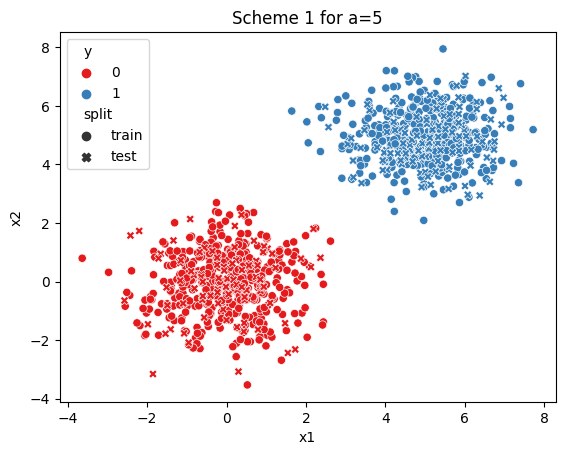

In [78]:
df = generate_data(5, 0)
train = df.iloc[:800]
test = df.iloc[800:]
generate_scatter_plot(train, test, 'Scheme 1 for a=5')

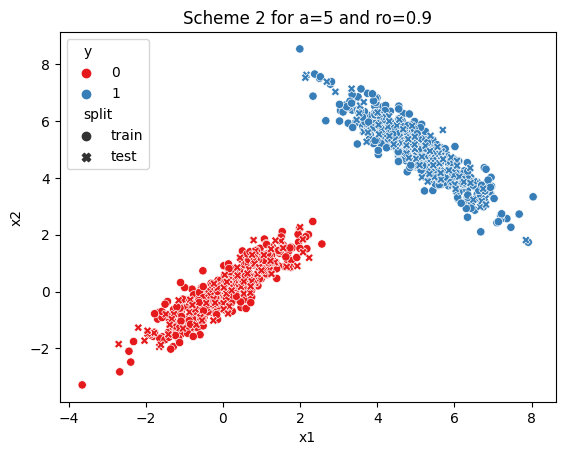

In [80]:
df = generate_data(5, 0.9)
train = df.iloc[:800]
test = df.iloc[800:]
generate_scatter_plot(train, test, 'Scheme 2 for a=5 and ro=0.9') 